# Feature Map - MNIST Data
- 모델 학습 전 convolution filter와 학습 후 convolution filter 확인
- convolution filter를 거친 이미지 데이터 결과를 확인하여 각 conv filter가 중요시하는 feature를 확인

## 데이터셋

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255, x_test / 255

# 데이터 수 x width x height x channel
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

## 신경망 구성

In [2]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(3, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 3)         30        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 3)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 3)         0         
                                                                 
 flatten (Flatten)           (None, 588)               0         
                                                                 
 dense (Dense)               (None, 1000)              589000    
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                        

## conv filter(weight) 확인

In [4]:
model.layers

In [6]:
conv = model.layers[0]  # conv2d layer

conv.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 3) dtype=float32, numpy=
 array([[[[-0.2577548 ,  0.25708622,  0.1925866 ]],
 
         [[-0.32654217, -0.00723833, -0.29820055]],
 
         [[-0.19100761, -0.2026143 , -0.00711539]]],
 
 
        [[[ 0.00381628,  0.2832368 , -0.03628337]],
 
         [[-0.12195879, -0.05907637,  0.07590726]],
 
         [[-0.2932546 ,  0.17139834, -0.15930429]]],
 
 
        [[[ 0.20234364,  0.29268092,  0.33404827]],
 
         [[-0.36463267,  0.29084718,  0.25963938]],
 
         [[-0.14586022,  0.10867405,  0.30070007]]]], dtype=float32)>,
 <tf.Variable 'conv2d/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

In [10]:
conv_weights = conv.weights[0].numpy()


conv_weights.mean(), conv_weights.std()

(0.011189689, 0.22215502)

In [12]:
conv_weights.reshape(-1, 1)

array([[-0.2577548 ],
       [ 0.25708622],
       [ 0.1925866 ],
       [-0.32654217],
       [-0.00723833],
       [-0.29820055],
       [-0.19100761],
       [-0.2026143 ],
       [-0.00711539],
       [ 0.00381628],
       [ 0.2832368 ],
       [-0.03628337],
       [-0.12195879],
       [-0.05907637],
       [ 0.07590726],
       [-0.2932546 ],
       [ 0.17139834],
       [-0.15930429],
       [ 0.20234364],
       [ 0.29268092],
       [ 0.33404827],
       [-0.36463267],
       [ 0.29084718],
       [ 0.25963938],
       [-0.14586022],
       [ 0.10867405],
       [ 0.30070007]], dtype=float32)

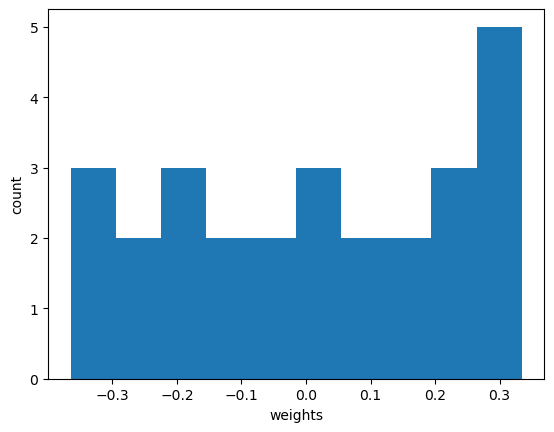

In [11]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

## 학습 전의 conv filter의 weight 확인

In [14]:
conv_weights[:, :, 0]

array([[[-0.2577548 ,  0.25708622,  0.1925866 ],
        [-0.32654217, -0.00723833, -0.29820055],
        [-0.19100761, -0.2026143 , -0.00711539]],

       [[ 0.00381628,  0.2832368 , -0.03628337],
        [-0.12195879, -0.05907637,  0.07590726],
        [-0.2932546 ,  0.17139834, -0.15930429]],

       [[ 0.20234364,  0.29268092,  0.33404827],
        [-0.36463267,  0.29084718,  0.25963938],
        [-0.14586022,  0.10867405,  0.30070007]]], dtype=float32)

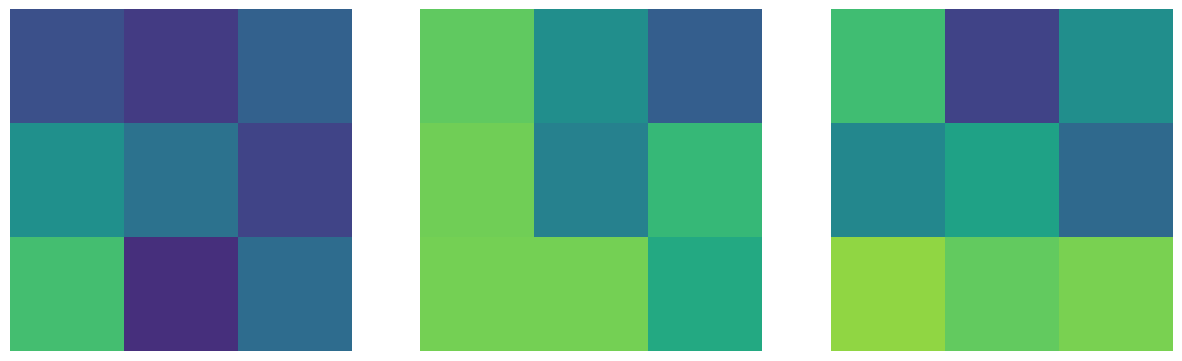

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3) :
    ax[i].imshow(conv_weights[:, :, 0, i], vmin=-0.5, vmax=0.5)
    ax[i].axis('off')

plt.show()

## 학습

In [16]:
%%time

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=5, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2509 - accuracy: 0.9224 - val_loss: 0.1164 - val_accuracy: 0.9618
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1210 - accuracy: 0.9625 - val_loss: 0.0672 - val_accuracy: 0.9778
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0884 - accuracy: 0.9711 - val_loss: 0.0560 - val_accuracy: 0.9808
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0692 - accuracy: 0.9775 - val_loss: 0.0574 - val_accuracy: 0.9810
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0592 - accuracy: 0.9799 - val_loss: 0.0552 - val_accuracy: 0.9824
CPU times: user 2min 30s, sys: 29.6 s, total: 2min 59s
Wall time: 1min 2s


## 학습 후 conv filter의 변화 확인

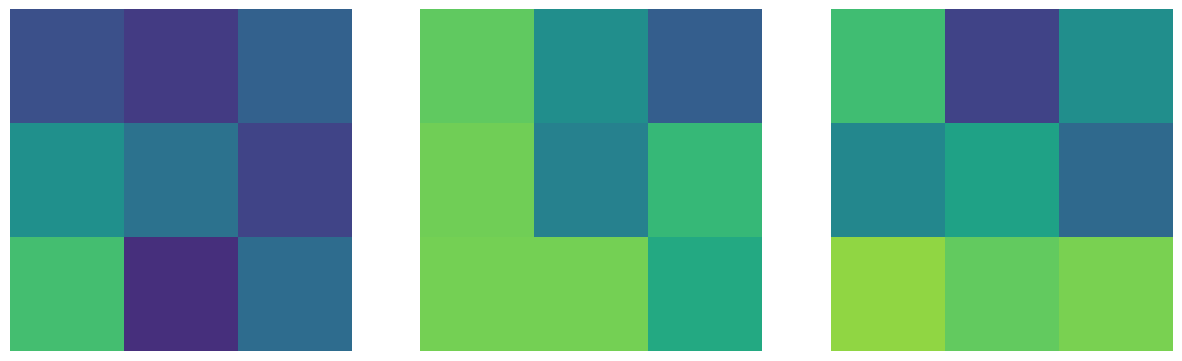

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3) :
    ax[i].imshow(conv_weights[:, :, 0, i], vmin=-0.5, vmax=0.5)
    ax[i].axis('off')
plt.show()

## conv filter를 통과한 이미지 데이터의 feature map 확인

In [20]:
model.layers[0].output

<KerasTensor: shape=(None, 28, 28, 3) dtype=float32 (created by layer 'conv2d')>

In [21]:
# 학습이 완료된 conv filter만 확인하기 위해 conv2d layer만 가져오기
inputs = x_train[0].reshape(-1, 28, 28, 1)
conv_layer_output = tf.keras.Model(model.input, model.layers[0].output)

conv_layer_output.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 3)         30        
                                                                 
Total params: 30 (120.00 Byte)
Trainable params: 30 (120.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
feature_maps = conv_layer_output.predict(inputs)

feature_maps.shape

1/1 [==============================] - 0s 51ms/step


(1, 28, 28, 3)

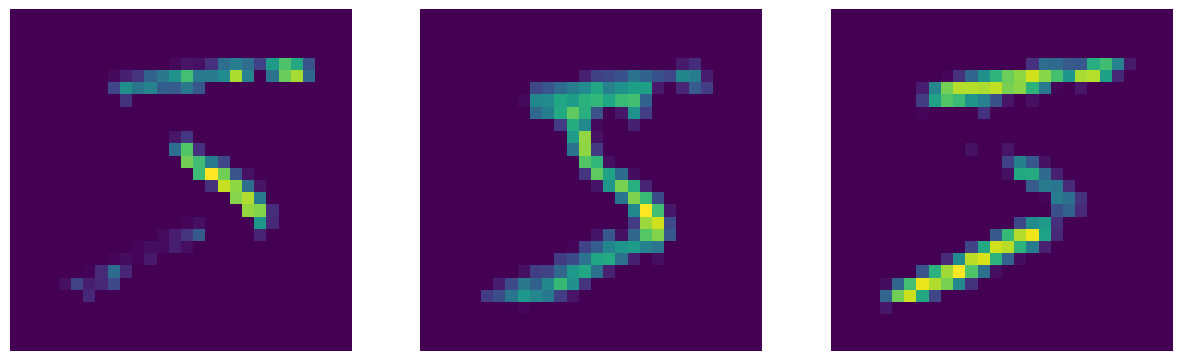

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3) :
    ax[i].imshow(feature_maps[0, :, :, i])
    ax[i].axis('off')

plt.show()

In [38]:
# feature map 추출 함수 정의
def draw_feature_maps(n) :
    inputs = x_train[n].reshape(-1, 28, 28, 1)
    feature_maps = conv_layer_output.predict(inputs)

    fig, ax = plt.subplots(1, 4, figsize=(15, 5))

    ax[0].imshow(inputs[0, :, :, 0], cmap='gray')
    for i in range(1, 4) :
        ax[i].imshow(feature_maps[0, :, :, i-1])
        ax[i].axis('off')

    plt.show()

1/1 [==============================] - 0s 17ms/step


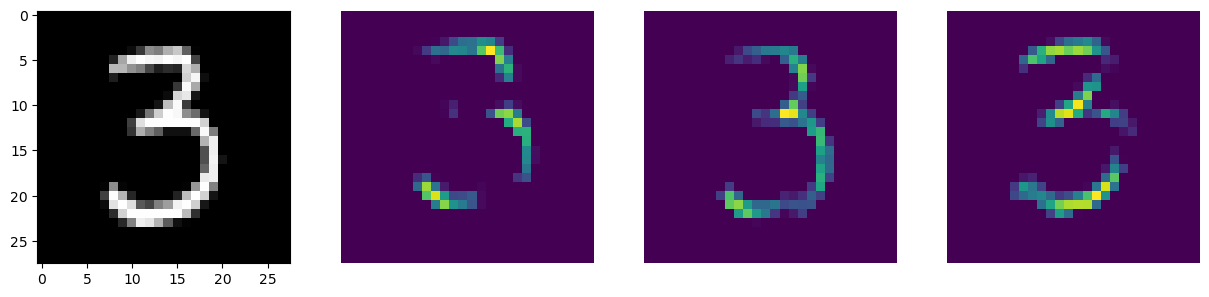

In [39]:
draw_feature_maps(50)

1/1 [==============================] - 0s 14ms/step


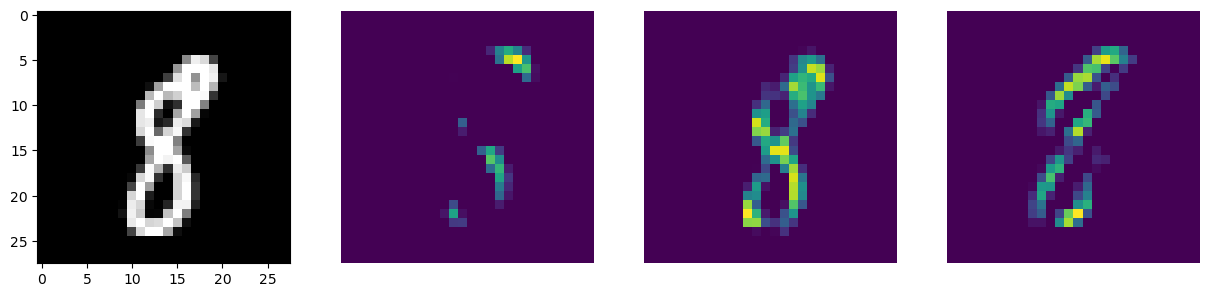

In [42]:
draw_feature_maps(300)

## 신경망의 Conv2D 특성 수 늘리기

In [43]:
model = models.Sequential([
    layers.Conv2D(8, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [44]:
%%time

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=5, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1692 - accuracy: 0.9489 - val_loss: 0.0625 - val_accuracy: 0.9782
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0703 - accuracy: 0.9777 - val_loss: 0.0444 - val_accuracy: 0.9861
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0467 - accuracy: 0.9850 - val_loss: 0.0437 - val_accuracy: 0.9849
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0363 - accuracy: 0.9883 - val_loss: 0.0418 - val_accuracy: 0.9864
Epoch 5/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0288 - accuracy: 0.9902 - val_loss: 0.0431 - val_accuracy: 0.9869
CPU times: user 4min 54s, sys: 52.2 s, total: 5min 46s
Wall time: 1min 58s


In [45]:
conv_layer_output = tf.keras.Model(model.input, model.layers[0].output)

def draw_feature_maps(n) :
    inputs = x_train[n].reshape(-1, 28, 28, 1)
    feature_maps = conv_layer_output.predict(inputs)

    fig, ax = plt.subplots(1, 9, figsize=(15, 5))

    ax[0].imshow(inputs[0, :, :, 0], cmap='gray')
    for i in range(1, 9) :
        ax[i].imshow(feature_maps[0, :, :, i-1])
        ax[i].axis('off')

    plt.show()

1/1 [==============================] - 0s 27ms/step


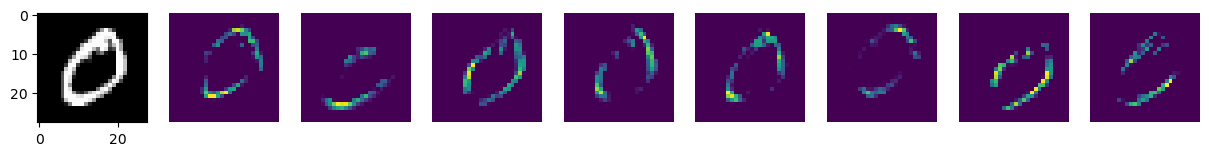

In [46]:
draw_feature_maps(1)

1/1 [==============================] - 0s 17ms/step


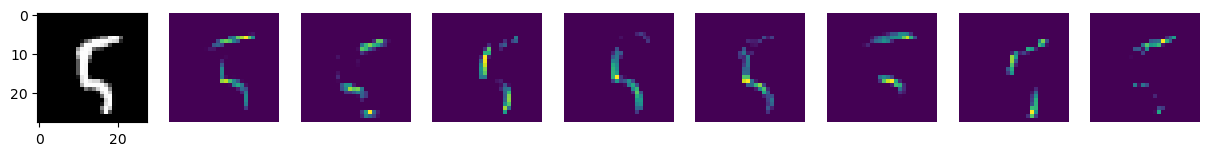

In [47]:
draw_feature_maps(100)